![SUSS](https://www.suss.edu.sg/Sitefinity/WebsiteTemplates/SUSS/App_Themes/SUSS/images/logo.png)

# ANL252 - Python for Data Analytics
### Group Based Assignment, July 2021 Presentation
#### Team Members:
* Muhammad Sharil Bin Ali
* Ong Meng Hui Sharon
* Ngan Jia Min

### Question 1 (a)

In [1]:
import numpy as np
X1 = [4, 6, 8, 4, 10, 1, 9, 5, 2, 7, 8, 2, 2, 8, 7, 9, 1, 4, 6, 9]
X2 = [0.2, 0.1, 0.3, 0.6, 0.1, 0.4, 0.6, 0.3, 0.5, 0.5, 0.1, 0.9, 0.8, 1, 
      0.9, 0.1, 0.2, 0.2, 0.7, 0.7]
Y1 = [1.16, 0.06, -1.79, 1.55, -4.88, 1.37, -1.25, -1.1, 3.23, -2.71, -0.99, 
      3.23, 4.55, 2.7, -1.13, -0.88, 2.08, 1.62, -0.9, 0.46]

data = np.stack((X1, X2, Y1), axis = 1)

### Question 1 (b)
Suppose a linear regression was fitted on these data. The estimated model is

$$\hat{Y}=2-0.5X_1+2.5X_2$$


Design a program to compute for Ŷ 

where Ŷ is the predicted (or expected) value of Y, X1 and X2 and store it in a <br> seperate NumPy Array

In [2]:
predicted_Y = 2 - 0.5*data[:,0] + 2.5*data[:,1]
predicted_Y

array([ 0.5 , -0.75, -1.25,  1.5 , -2.75,  2.5 , -1.  ,  0.25,  2.25,
       -0.25, -1.75,  3.25,  3.  ,  0.5 ,  0.75, -2.25,  2.  ,  0.5 ,
        0.75, -0.75])

### Question 1 (c)
The residuals of the model ê are calculated by:
$$\hat{e}=\ Y\ -\ \hat{Y}$$
where Y is the actual value and Ŷ is the predicted value of Y and store the <br>
results in a separate NumPy array.


In [3]:
e = data[:,2] - predicted_Y
e

array([ 0.66,  0.81, -0.54,  0.05, -2.13, -1.13, -0.25, -1.35,  0.98,
       -2.46,  0.76, -0.02,  1.55,  2.2 , -1.88,  1.37,  0.08,  1.12,
       -1.65,  1.21])

### Question 1 (d)
One of the main assumptions for linear regression is that the residuals must be <br> 
normally distributed with zero mean and constant variance.
 
Create a histogram of the residuals calculated in (c) by using the matplotlib package.

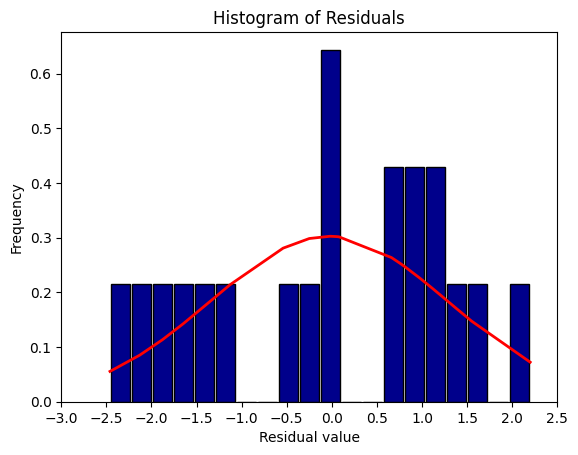

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot PDF of residual value
e = np.sort(e)
fit = norm.pdf(e, np.mean(e), np.std(e))
plt.plot(e, fit, linewidth=2, color="Red")

# Plot histogram
plt.hist(e, edgecolor="black", color="darkblue", align="mid",
         rwidth = 0.9, bins=20, density=True)

# Plotting x ticks
# Set X axis to min and max of residual value
plt.xticks(np.arange(round(min(e)-1), round(max(e)+1), 0.5))

# Labels and title
plt.title("Histogram of Residuals")
plt.xlabel("Residual value")
plt.ylabel("Frequency")
plt.show()

### Question 1 (e)
The constant variance assumption can be checked by a scatter plot in which the<br>
x-axis represents the values of the predicted values Ŷ and the y-axis represents<br>
the residuals ê. 

Write a Python program to create such a scatter plot for checking the constant<br>
variance assumption.


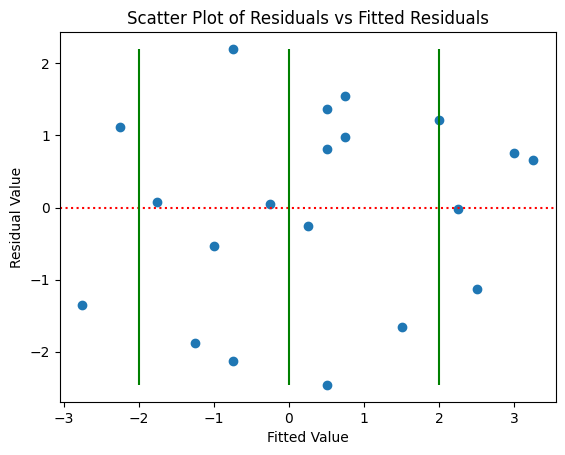

In [5]:
# Plot scatter plot for values of Ŷ and ê
plt.scatter(predicted_Y, e)

# Reference Line
plt.axhline(y=0, color="red", linestyle="dotted")
# Plot vertical lines in scatter plot
plt.vlines([-2, 0, 2], ymin=min(e), ymax=max(e), color="g")

# Labels and title
plt.title("Scatter Plot of Residuals vs Fitted Residuals")
plt.xlabel("Fitted Value")
plt.ylabel("Residual Value")
plt.show()

### Conclusion Question 1 (e)
Based on the scatter plot, we can agree that the constant variance assumption is <br>
valid as there are no patterns in the scatter plot that indicates that there is <br>
a relationship between the residual value and fitted value.

Therefore, the constant variance assumption is valid.

### Question 2 (a)
Convert data in .csv file into pandas DataFrame.

Check for any missing data, and adjust reader accordingly.

In [6]:
import pandas as pd

# Read and store data from .csv file to a DataFrame
df = pd.read_csv("class.csv")
# Set student ID as index
df = df.set_index("StudentID")
df.isnull().all() # Returns all false
df.head(5) # Missing data are represented by "."

,Gender,Age,Height,Weight
StudentID,,,,
1,.,14,69,112.5
2,F,13,56.5,84
3,F,13,65.3,98
4,F,14,62.8,102.5
5,M,14,63.5,102.5


In [7]:
df = df.replace(".", None) # "." values are replaced with None

### Question 2 (b)
Sort data by descending order for age and then by gender in ascending order of the students.

In [8]:
df = df.sort_values(by=["Age", "Gender"], ascending=[False, True])
df

,Gender,Age,Height,Weight
StudentID,,,,
15,M,16,72,150
8,F,15,62.5,112.5
14,F,15,66.5,112
17,M,15,67,133
19,M,15,66.5,None
4,F,14,62.8,102.5
12,F,14,None,90
5,M,14,63.5,102.5
1,None,14,69,112.5


### Question 2 (c)
Identify the location of the missing values in the DataFrame. 

Report the rows and columns where the missing data are found.

In [9]:
df[df.isnull().any(axis=1)]

,Gender,Age,Height,Weight
StudentID,,,,
19,M,15,66.5,None
12,F,14,None,90
1,None,14,69,112.5
6,M,None,57.3,83


### Question 2 (d)
Here are the instructions of how we should deal with the
missing data in each column:

* Gender – replace missing values by the gender with the highest frequency
* Age – replace missing values by the median age
* Height – replace missing values by the mean height
* Weight – replace missing values by the mean weight


In [10]:
df.dtypes

Gender    object
Age       object
Height    object
Weight    object
dtype: object

In [24]:
# Get highest frequency of gender
replace_gender = df["Gender"].value_counts().idxmax()
df["Gender"] = df["Gender"].replace([None], replace_gender)

# Get median of age
replace_age = df["Age"].median()
df["Age"] = df["Age"].replace([None], replace_age)

# Height and Weight are obj dtypes, requires conversion to float to find mean
df[["Height","Weight"]] = df[["Height","Weight"]].apply(pd.to_numeric, axis=1)
replace_height = round(df["Height"].mean(), 1)
replace_weight = round(df["Weight"].mean(), 1)
df["Height"] = df["Height"].replace(np.nan, replace_weight)
df["Weight"] = df["Weight"].replace(np.nan, replace_weight)
df

,Gender,Age,Height,Weight
StudentID,,,,
15,M,16,72.0,150.0
8,F,15,62.5,112.5
14,F,15,66.5,112.0
17,M,15,67.0,133.0
19,M,15,66.5,99.4
4,F,14,62.8,102.5
12,F,14,99.4,90.0
5,M,14,63.5,102.5
1,F,14,69.0,112.5


### Question 2 (e)

Use Python code to detect outliers in the DataFrame and delete the corresponding rows <br>
if they exist.



In [25]:
for column in df.columns[2:]:
    Q1 = pd.to_numeric(df[column]).quantile(0.25)
    Q3 = pd.to_numeric(df[column]).quantile(0.75)
    IQR = Q3 - Q1
    df = df.drop(df.index[(pd.to_numeric(df[column]) < Q1 - 1.5*IQR) | 
                          (pd.to_numeric(df[column]) > Q3 + 1.5*IQR)])
df

,Gender,Age,Height,Weight
StudentID,,,,
15,M,16,72.0,150.0
8,F,15,62.5,112.5
14,F,15,66.5,112.0
17,M,15,67.0,133.0
19,M,15,66.5,99.4
4,F,14,62.8,102.5
5,M,14,63.5,102.5
1,F,14,69.0,112.5
2,F,13,56.5,84.0
